## Results of point pollution dilbit spill scenarios at Turn Point
Plotting functions for comparing survival and recovery of groups of species within a single model scenario from the Salish Sea Atlantis Model

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

### Define scenario and control files

In [2]:
# Read in salish sea atlantis output files.
scenario_path = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/')

control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/control_v6666mod/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)
time = np.ma.filled(control.variables['t'], np.nan)

In [3]:
# time after burn-in
start = 20
end = time.size-1

In [8]:
#regions by Atlantis boxes
JdF_west = [1,2,3,4]
JdF_east = [5,6,7,8,9,10,11]
Haro_Boundary = [60,33,34,35,36]
SoG_south = [54,64,68,79]
SoG_center = [80,81,82,83,84,85]
SoG_north = [88,92.98,101,102]
PS_main = [20,21,23,26]

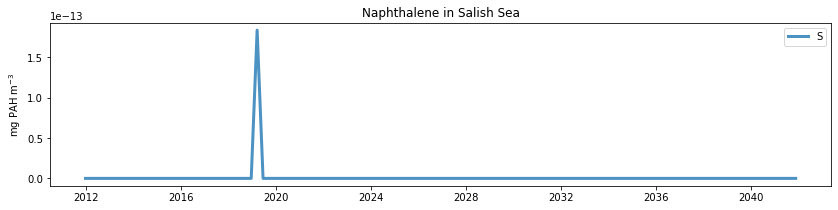

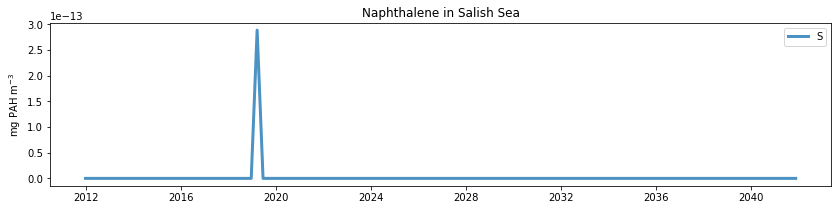

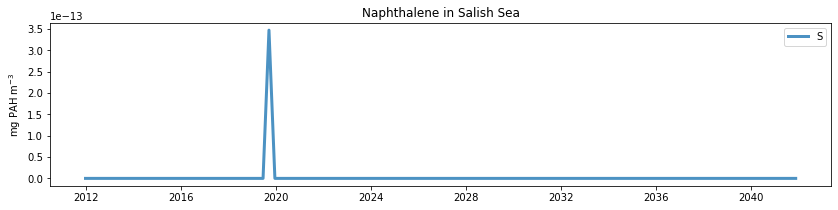

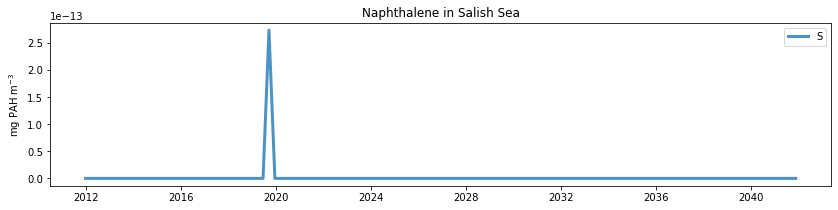

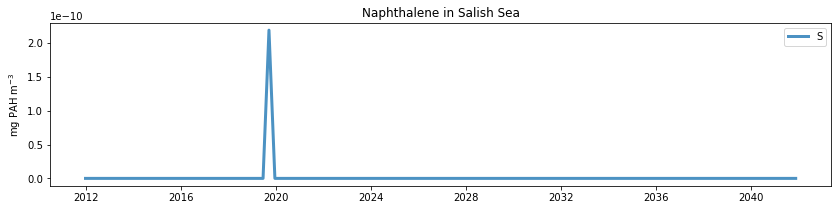

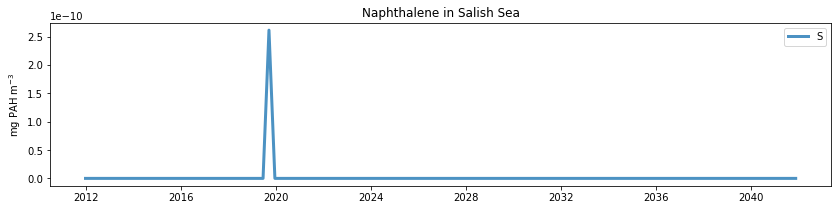

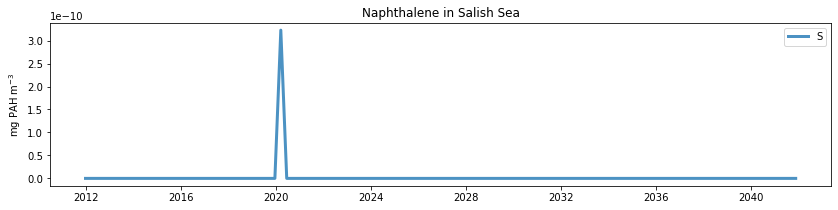

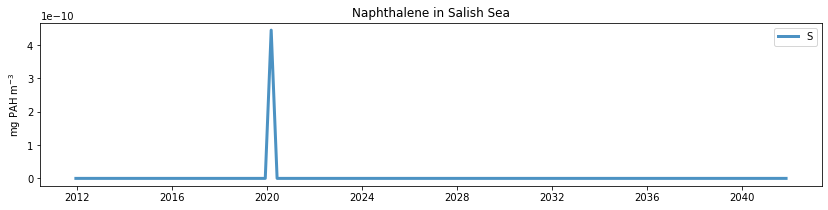

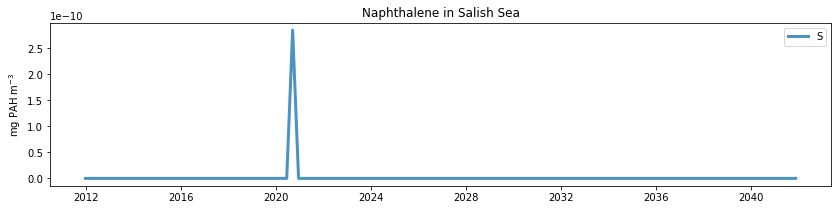

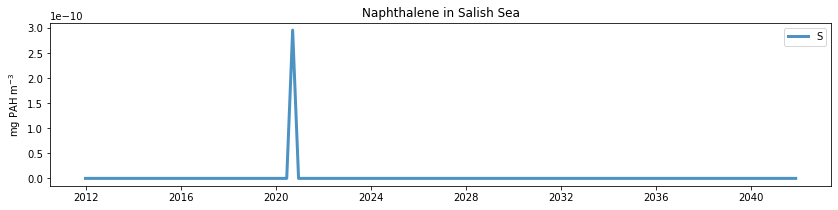

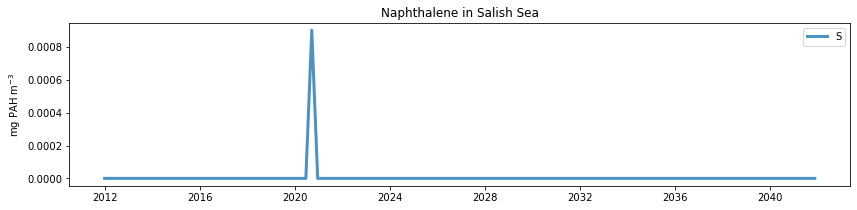

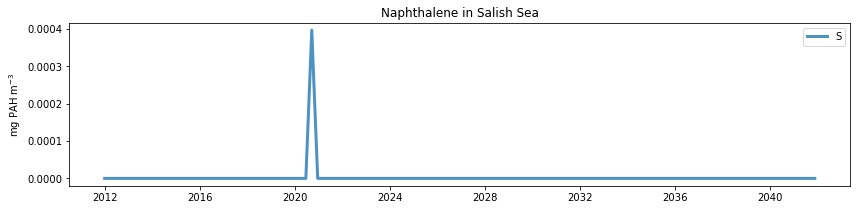

In [5]:
scens = sorted([p for p in scenario_path.glob('*Scenario_5b_*/outputSalishSea.nc')])
#names = []

for path in scens:
    fig, ax = plt.subplots(figsize = (14,3))
    scenario = xr.open_dataset(str(path), decode_cf=True)

    nm = str(path).split(sep = '/')
    name = nm[7]
    #names.append(nm[7])

    Phe = np.ma.filled(scenario.variables['Naphthalene'][start:end,:,:], np.nan)
    Phe = Phe.sum(axis=2)
    Phe = Phe.sum(axis=1)
    ax.plot(time[start:end], Phe, linewidth = 3, alpha=0.8)
    ax.set_title('Naphthalene in Salish Sea', fontsize = 12)
    ax.set_ylabel('mg PAH m$^{-3}$')
    ax.legend(name, loc='best'); #center right, lower center, upper center, center


## Plankton

### Haro Strait Boundary

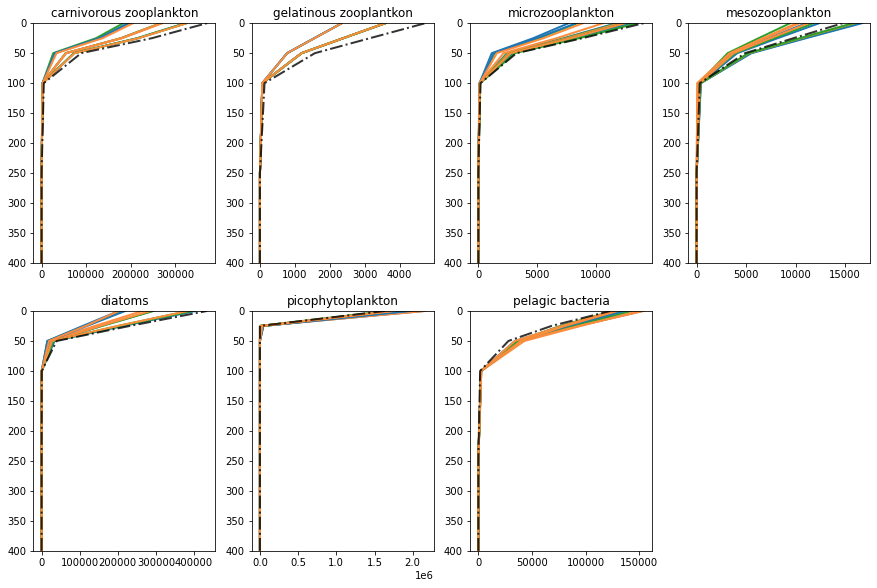

In [6]:
group = groups.plankton
fig = plt.figure(figsize=(15, 15), facecolor='white')
gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

depth = [400, 250, 100, 50, 25, 0]
names = []

for species in group:

    bio_index = (list(group).index(species))

    if bio_index < 4:
        position = 0, bio_index
    elif bio_index > 8: 
        position = 2, bio_index-8
    else :
        position = 1, bio_index-4

    ax = fig.add_subplot(gs[position])
 
    pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,Haro_Boundary,0:6], np.nan)
    p_control = pelagic_control.sum(axis=1)
    p_control = p_control.sum(axis=0)
    ax.set_ylim(400, 0)  # decreasing depth
    for path in scens:

        nm = str(path).split(sep = '_')
        names.append(nm[3])

        if "-01-" in nm[3]:
            line_colour = '#1f77b4'
        elif "-04-" in nm[3]:
            line_colour = '#2ca02c'
        elif "-07-" in nm[3]:
            line_colour = '#fd8d3d'
        else:
            line_colour = '#8b564c'

        scenario =  xr.open_dataset(str(path), decode_cf=True)
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,Haro_Boundary,0:6], np.nan) # tonnes, take only water column layers
        p_oiled = pelagic_oiled.sum(axis=1)
        p_oiled = p_oiled.sum(axis=0)
        ax.plot(p_oiled, depth, color=line_colour, linewidth = 2)
    ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
    ax.set_title(species);

### Juan de Fuca Strait, East

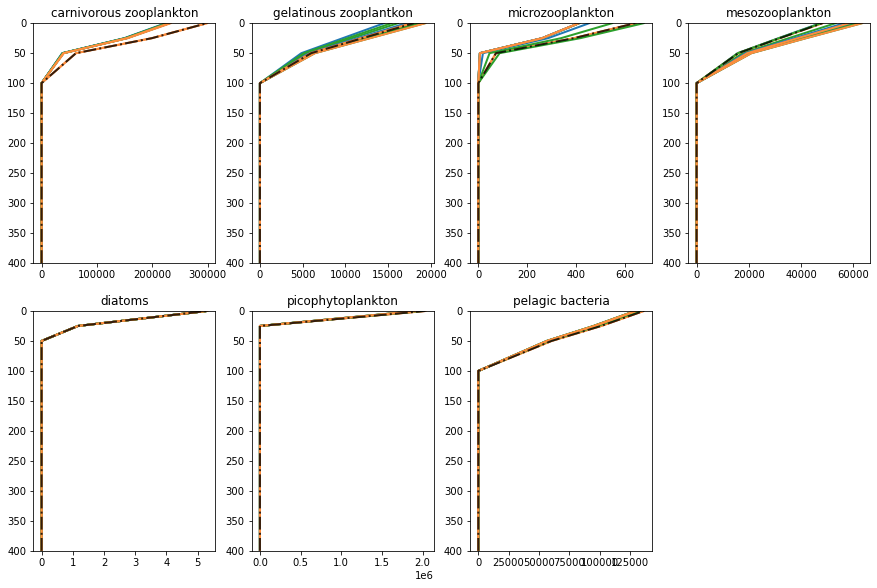

In [7]:
group = groups.plankton
fig = plt.figure(figsize=(15, 15), facecolor='white')
gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

depth = [400, 250, 100, 50, 25, 0]
names = []

for species in group:

    bio_index = (list(group).index(species))

    if bio_index < 4:
        position = 0, bio_index
    elif bio_index > 8: 
        position = 2, bio_index-8
    else :
        position = 1, bio_index-4

    ax = fig.add_subplot(gs[position])
    pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,1:5,0:6], np.nan)
    p_control = pelagic_control.sum(axis=1)
    p_control = p_control.sum(axis=0)
    ax.set_ylim(400, 0)  # decreasing depth
    for path in scens:

        nm = str(path).split(sep = '_')
        names.append(nm[3])

        if "-01-" in nm[3]:
            line_colour = '#1f77b4'
        elif "-04-" in nm[3]:
            line_colour = '#2ca02c'
        elif "-07-" in nm[3]:
            line_colour = '#fd8d3d'
        else:
            line_colour = '#8b564c'

        scenario =  xr.open_dataset(str(path), decode_cf=True)
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,1:5,0:6], np.nan) # tonnes, take only water column layers
        p_oiled = pelagic_oiled.sum(axis=1)
        p_oiled = p_oiled.sum(axis=0)
        ax.plot(p_oiled, depth, color=line_colour, linewidth = 2)
    ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
    ax.set_title(species);

### SoG south

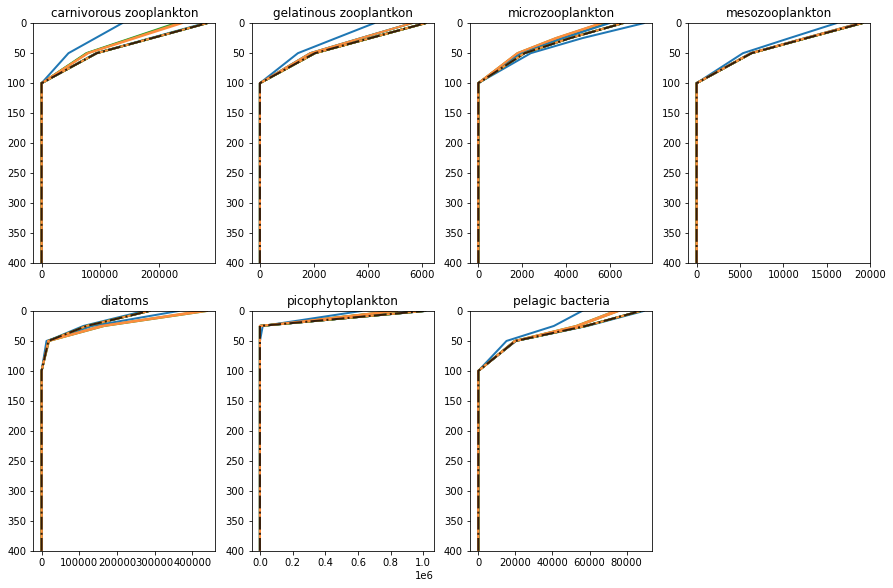

In [9]:
group = groups.plankton
fig = plt.figure(figsize=(15, 15), facecolor='white')
gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

depth = [400, 250, 100, 50, 25, 0]
names = []

for species in group:

    bio_index = (list(group).index(species))

    if bio_index < 4:
        position = 0, bio_index
    elif bio_index > 8: 
        position = 2, bio_index-8
    else :
        position = 1, bio_index-4

    ax = fig.add_subplot(gs[position])
    pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,SoG_south,0:6], np.nan)
    p_control = pelagic_control.sum(axis=1)
    p_control = p_control.sum(axis=0)
    ax.set_ylim(400, 0)  # decreasing depth
    for path in scens:

        nm = str(path).split(sep = '_')
        names.append(nm[3])

        if "-01-" in nm[3]:
            line_colour = '#1f77b4'
        elif "-04-" in nm[3]:
            line_colour = '#2ca02c'
        elif "-07-" in nm[3]:
            line_colour = '#fd8d3d'
        else:
            line_colour = '#8b564c'

        scenario =  xr.open_dataset(str(path), decode_cf=True)
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,SoG_south,0:6], np.nan) # tonnes, take only water column layers
        p_oiled = pelagic_oiled.sum(axis=1)
        p_oiled = p_oiled.sum(axis=0)
        ax.plot(p_oiled, depth, color=line_colour, linewidth = 2)
    ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
    ax.set_title(species);

### SoG Center

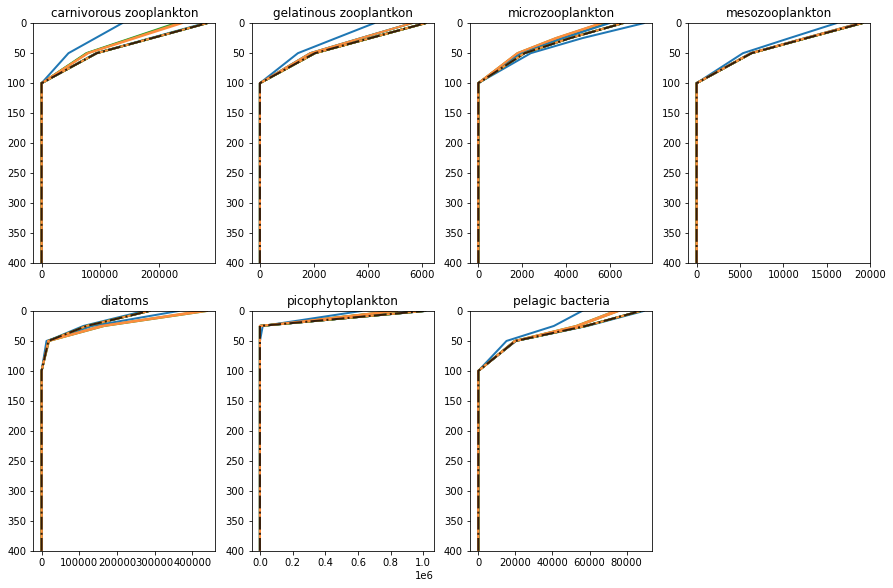

In [10]:
group = groups.plankton
fig = plt.figure(figsize=(15, 15), facecolor='white')
gs = plt.GridSpec(3, 4, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1, 1], height_ratios=[1, 1, 1]) 

depth = [400, 250, 100, 50, 25, 0]
names = []

for species in group:

    bio_index = (list(group).index(species))

    if bio_index < 4:
        position = 0, bio_index
    elif bio_index > 8: 
        position = 2, bio_index-8
    else :
        position = 1, bio_index-4

    ax = fig.add_subplot(gs[position])
    pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,SoG_south,0:6], np.nan)
    p_control = pelagic_control.sum(axis=1)
    p_control = p_control.sum(axis=0)
    ax.set_ylim(400, 0)  # decreasing depth
    for path in scens:

        nm = str(path).split(sep = '_')
        names.append(nm[3])

        if "-01-" in nm[3]:
            line_colour = '#1f77b4'
        elif "-04-" in nm[3]:
            line_colour = '#2ca02c'
        elif "-07-" in nm[3]:
            line_colour = '#fd8d3d'
        else:
            line_colour = '#8b564c'

        scenario =  xr.open_dataset(str(path), decode_cf=True)
        pelagic_oiled = np.ma.filled(scenario.variables[group[species] + '_N'][start:end,SoG_south,0:6], np.nan) # tonnes, take only water column layers
        p_oiled = pelagic_oiled.sum(axis=1)
        p_oiled = p_oiled.sum(axis=0)
        ax.plot(p_oiled, depth, color=line_colour, linewidth = 2)
    ax.plot(p_control, depth, '-.k', linewidth = 2, alpha=0.8)
    ax.set_title(species);